In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import hamming_loss, accuracy_score, precision_recall_fscore_support

In [6]:
import pickle
import json


In [7]:
results = pd.read_csv("results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47126 non-null  object 
 1   home_team   47111 non-null  object 
 2   away_team   47111 non-null  object 
 3   home_score  47075 non-null  float64
 4   away_score  47075 non-null  float64
 5   tournament  47126 non-null  object 
 6   city        47126 non-null  object 
 7   country     47126 non-null  object 
 8   neutral     47126 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [9]:
results.describe()

,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [10]:
unique_values = results['home_team'].unique()
unique_values

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Guernsey', 'Jersey', 'Netherlands',
       'Czechoslovakia', 'Alderney', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Catalonia', 'Philippines', 'Basque Country',
       'China PR', 'Brazil', 'Japan', 'Paraguay', 'Canada', 'Estonia',
       'Costa Rica', 'Guatemala', 'Spain', 'Brittany', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Galicia',
       'Portugal', 'Andalusia', 'Australia', 'Lithuania', 'Turkey',
       'Central Spain', 'Mexico', 'Aruba', 'Egypt', 'Republic of Ireland',
       'Haiti', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia', 'Peru',
       'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Trinidad and Tobago', 'Greece', 'Cuba', 'Curaçao',
       'Dominica', 'Silesia', 'Guadeloupe', 'Isra

In [11]:
goalscorers = pd.read_csv("goalscorers.csv")
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [12]:
goalscorers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


# Data Cleaning: Handle NA values


In [13]:
# convert the colunm date to a datatime format and merge data frames 
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])
df1 = pd.merge(results, goalscorers, on=['date', 'home_team', 'away_team'], how='inner')
df1 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,Buenos Aires,Argentina,False,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44105,2024-02-10,Qatar,Jordan,3.0,1.0,AFC Asian Cup,Lusail,Qatar,False,Qatar,Akram Afif,73.0,False,True
44106,2024-02-10,Qatar,Jordan,3.0,1.0,AFC Asian Cup,Lusail,Qatar,False,Qatar,Akram Afif,90.0,False,True
44107,2024-02-11,Ivory Coast,Nigeria,2.0,1.0,African Cup of Nations,Ebimpé,Ivory Coast,False,Nigeria,William Troost-Ekong,38.0,False,False
44108,2024-02-11,Ivory Coast,Nigeria,2.0,1.0,African Cup of Nations,Ebimpé,Ivory Coast,False,Ivory Coast,Franck Kessié,62.0,False,False


In [14]:
# now I'm checking for missing values
df1.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
city            0
country         0
neutral         0
team            0
scorer         50
minute        263
own_goal        2
penalty         2
dtype: int64

In [15]:
df1.shape

(44110, 14)

In [16]:
# Since there are not many, I decided to drop them
df2 = df1.dropna()
df2.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
team          0
scorer        0
minute        0
own_goal      0
penalty       0
dtype: int64

In [17]:
df2.shape

(43847, 14)

In [18]:
# unique values in tournaments to have an idea of what tournament are inlcuded in the data set
unique_values = df2['tournament'].unique()
unique_values

array(['Copa América', 'Olympic Games', 'Baltic Cup', 'FIFA World Cup',
       'FIFA World Cup qualification', 'NAFC Championship',
       'AFC Asian Cup', 'African Cup of Nations',
       'UEFA Euro qualification', 'UEFA Euro', 'CONCACAF Championship',
       'CONCACAF Championship qualification', 'British Home Championship',
       'Oceania Nations Cup', 'CONMEBOL–UEFA Cup of Champions',
       'Gold Cup', 'Confederations Cup', 'UEFA Nations League'],
      dtype=object)

In [19]:
# We are only taking into consideration the continental competitions, friendly matches, and World Cup qualifiers
df3 = df2[df2['tournament'].isin(['Copa América', 'Friendly','FIFA World Cup','FIFA World Cup qualification','CONCACAF Championship','CONCACAF Championship qualification','Gold Cup', 'CONCACAF Nations League', 'UEFA Nations League', 'UEFA Euro','UEFA Euro qualification' ])]
df3

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,Buenos Aires,Argentina,False,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Ante Budimir,43.0,False,False
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Joan Cervós,29.0,True,False
43856,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Gadi Kinda,81.0,False,False
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Dmitry Antilevsky,43.0,False,False


In [20]:
column_types = df3.dtypes
column_types

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
city                  object
country               object
neutral                 bool
team                  object
scorer                object
minute               float64
own_goal              object
penalty               object
dtype: object

In [21]:
# Change the boolean data type in the 'neutral' column to indicate whether it is neutral or not. Also, rename the column to "location"
df3 = df3.rename(columns={'neutral': 'location'})

df3['location'] = df3['location'].replace({True: 'neutral', False: 'partisan'})

In [22]:
# After analyzing some columns, I noticed that I don't need all of them, so I'm dropping some.

df4 = df3.drop(['city','country','team','penalty', 'own_goal', 'scorer'  ],axis='columns')
df4.shape


(39536, 8)

# Feature Engineering


In [23]:
# I want to assign a value of 2x for goals scored in tournaments, 1.5x for goals in less difficult tournaments, and 1x for goals in friendly games.conditions = [
conditions = [
    (df4['tournament'] == 'Copa América') | 
    (df4['tournament'] == 'Gold Cup') | 
    (df4['tournament'] == 'UEFA Euro') |
    (df4['tournament'] == 'FIFA World Cup qualification') | 
    (df4['tournament'] == 'FIFA World Cup'),
    
    (df4['tournament'] == 'CONCACAF Nations League')| 
    (df4['tournament'] == 'UEFA Nations League')| 
    (df4['tournament'] == 'UEFA Euro qualification')
]



# Defining the corresponding multipliers
multipliers = [2, 1.5]

df5 = df4.copy()

# Using np.select to create the new columns based on the conditions and multipliers
df5['tournament_home_score'] = np.select(conditions, multipliers, default=1) * df5['home_score']
df5['tournament_away_score'] = np.select(conditions, multipliers, default=1) * df5['away_score']

df5

,date,home_team,away_team,home_score,away_score,tournament,location,minute,tournament_home_score,tournament_away_score
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,44.0,0.0,8.0
1,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,55.0,0.0,8.0
2,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,70.0,0.0,8.0
3,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,75.0,0.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,2.0,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,43.0,1.5,0.0
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,29.0,0.0,3.0
43856,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,81.0,0.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,43.0,0.0,1.5


In [24]:
# Creating new columns for differentiate of goals
df5['difference_of_goals'] = abs(df5['home_score'] - df5['away_score'])
df5['difference_of_goals_tournament'] = abs(df5['tournament_home_score'] - df5['tournament_away_score'])

df5


,date,home_team,away_team,home_score,away_score,tournament,location,minute,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,44.0,0.0,8.0,4.0,8.0
1,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,55.0,0.0,8.0,4.0,8.0
2,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,70.0,0.0,8.0,4.0,8.0
3,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,75.0,0.0,8.0,4.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,2.0,12.0,2.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,43.0,1.5,0.0,1.0,1.5
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,29.0,0.0,3.0,2.0,3.0
43856,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,81.0,0.0,3.0,2.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,43.0,0.0,1.5,1.0,1.5


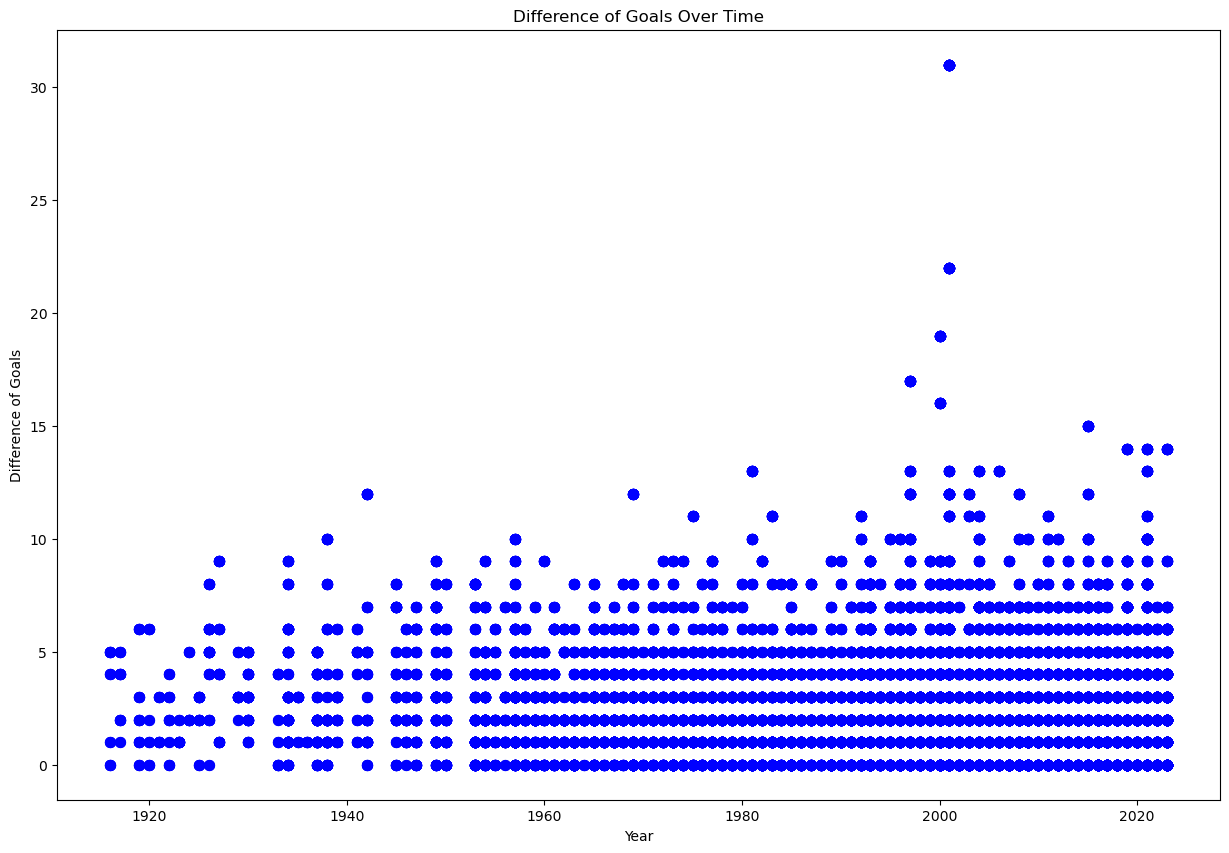

In [25]:
# Let's analyze how the difference in goals has changed over the years to determine if it has been decisive.
def plot_goals_over_time(df):
    plt.figure(figsize=(15, 10))
    
    year = pd.to_datetime(df['date']).dt.year
    
    plt.scatter(year, df['difference_of_goals'], color='blue', s=50)
    
    plt.xlabel("Year")
    plt.ylabel("Difference of Goals")
    plt.title("Difference of Goals Over Time")
    
    plt.show()

plot_goals_over_time(df5)

In [26]:
#Calculate the frequency of each unique value (goal difference) in the 'difference of goals' column of df5.
goals_difference_stats = df5['difference_of_goals'].value_counts()

goals_difference_stats

1.0     10025
2.0      8247
3.0      5769
0.0      5019
4.0      3622
5.0      2521
6.0      1602
7.0      1021
8.0       674
9.0       361
10.0      214
12.0      120
11.0      101
13.0       78
14.0       42
31.0       31
22.0       22
19.0       19
17.0       17
16.0       16
15.0       15
Name: difference_of_goals, dtype: int64

In [27]:
# Calculate the frequency of each unique value in the "difference of goals" column of df5
minute_goal = df5['minute'].value_counts()

minute_goal

90.0     1562
45.0      807
89.0      613
75.0      559
88.0      551
         ... 
96.0        2
113.0       2
100.0       2
99.0        2
122.0       1
Name: minute, Length: 121, dtype: int64

# Outlier Removal Using Sports Logic


In [28]:
# I think a difference of 10 goals is unusual and doesn't reflect an objective result, so let's remove all those
df6 = df5.copy()

df6 = df6[df6['difference_of_goals'] <= 9]
df6

,date,home_team,away_team,home_score,away_score,tournament,location,minute,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,44.0,0.0,8.0,4.0,8.0
1,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,55.0,0.0,8.0,4.0,8.0
2,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,70.0,0.0,8.0,4.0,8.0
3,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,75.0,0.0,8.0,4.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,2.0,12.0,2.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,43.0,1.5,0.0,1.0,1.5
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,29.0,0.0,3.0,2.0,3.0
43856,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,81.0,0.0,3.0,2.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,43.0,0.0,1.5,1.0,1.5


In [29]:
# Setting a filter to only include goals scored in regular time
min_score = df6[df6['minute'] > 95]
min_score 

,date,home_team,away_team,home_score,away_score,tournament,location,minute,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
65,1919-05-29,Brazil,Uruguay,1.0,0.0,Copa América,partisan,122.0,2.0,0.0,1.0,2.0
797,1934-05-27,Austria,France,3.0,2.0,FIFA World Cup,neutral,109.0,6.0,4.0,1.0,2.0
798,1934-05-27,Austria,France,3.0,2.0,FIFA World Cup,neutral,116.0,6.0,4.0,1.0,2.0
962,1937-02-01,Argentina,Brazil,2.0,0.0,Copa América,partisan,102.0,4.0,0.0,2.0,4.0
963,1937-02-01,Argentina,Brazil,2.0,0.0,Copa América,partisan,112.0,4.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43202,2023-06-14,Netherlands,Croatia,2.0,4.0,UEFA Nations League,partisan,116.0,3.0,6.0,2.0,3.0
43443,2023-07-09,United States,Canada,2.0,2.0,Gold Cup,partisan,109.0,4.0,4.0,0.0,0.0
43444,2023-07-09,United States,Canada,2.0,2.0,Gold Cup,partisan,114.0,4.0,4.0,0.0,0.0
43445,2023-07-12,United States,Panama,1.0,1.0,Gold Cup,partisan,99.0,2.0,2.0,0.0,0.0


In [30]:
# Let's eliminate all scores in extra time, as I want to base all games on regular time
df6 = df6[df6['minute'] <= 93]
df6


,date,home_team,away_team,home_score,away_score,tournament,location,minute,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,44.0,0.0,8.0,4.0,8.0
1,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,55.0,0.0,8.0,4.0,8.0
2,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,70.0,0.0,8.0,4.0,8.0
3,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,75.0,0.0,8.0,4.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,2.0,12.0,2.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,43.0,1.5,0.0,1.0,1.5
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,29.0,0.0,3.0,2.0,3.0
43856,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,81.0,0.0,3.0,2.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,43.0,0.0,1.5,1.0,1.5


In [31]:
# Let's drop all the values that are repeated (due to multiple scorers in the same game)
df6= df6.drop_duplicates(subset=['date', 'home_team', 'home_score'])
df6

,date,home_team,away_team,home_score,away_score,tournament,location,minute,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,44.0,0.0,8.0,4.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,2.0,12.0,2.0,5.0,10.0
11,1916-07-08,Brazil,Chile,1.0,1.0,Copa América,neutral,29.0,2.0,2.0,0.0,0.0
13,1916-07-10,Argentina,Brazil,1.0,1.0,Copa América,partisan,10.0,2.0,2.0,0.0,0.0
15,1916-07-12,Brazil,Uruguay,1.0,2.0,Copa América,neutral,8.0,2.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43852,2023-11-21,Wales,Turkey,1.0,1.0,UEFA Euro qualification,partisan,7.0,1.5,1.5,0.0,0.0
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,43.0,1.5,0.0,1.0,1.5
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,29.0,0.0,3.0,2.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,43.0,0.0,1.5,1.0,1.5


In [32]:
# Dropping minute column
df6 = df6.drop(['minute'],axis='columns')
df6

,date,home_team,away_team,home_score,away_score,tournament,location,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,0.0,8.0,4.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,12.0,2.0,5.0,10.0
11,1916-07-08,Brazil,Chile,1.0,1.0,Copa América,neutral,2.0,2.0,0.0,0.0
13,1916-07-10,Argentina,Brazil,1.0,1.0,Copa América,partisan,2.0,2.0,0.0,0.0
15,1916-07-12,Brazil,Uruguay,1.0,2.0,Copa América,neutral,2.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
43852,2023-11-21,Wales,Turkey,1.0,1.0,UEFA Euro qualification,partisan,1.5,1.5,0.0,0.0
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,1.5,0.0,1.0,1.5
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,0.0,3.0,2.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,0.0,1.5,1.0,1.5


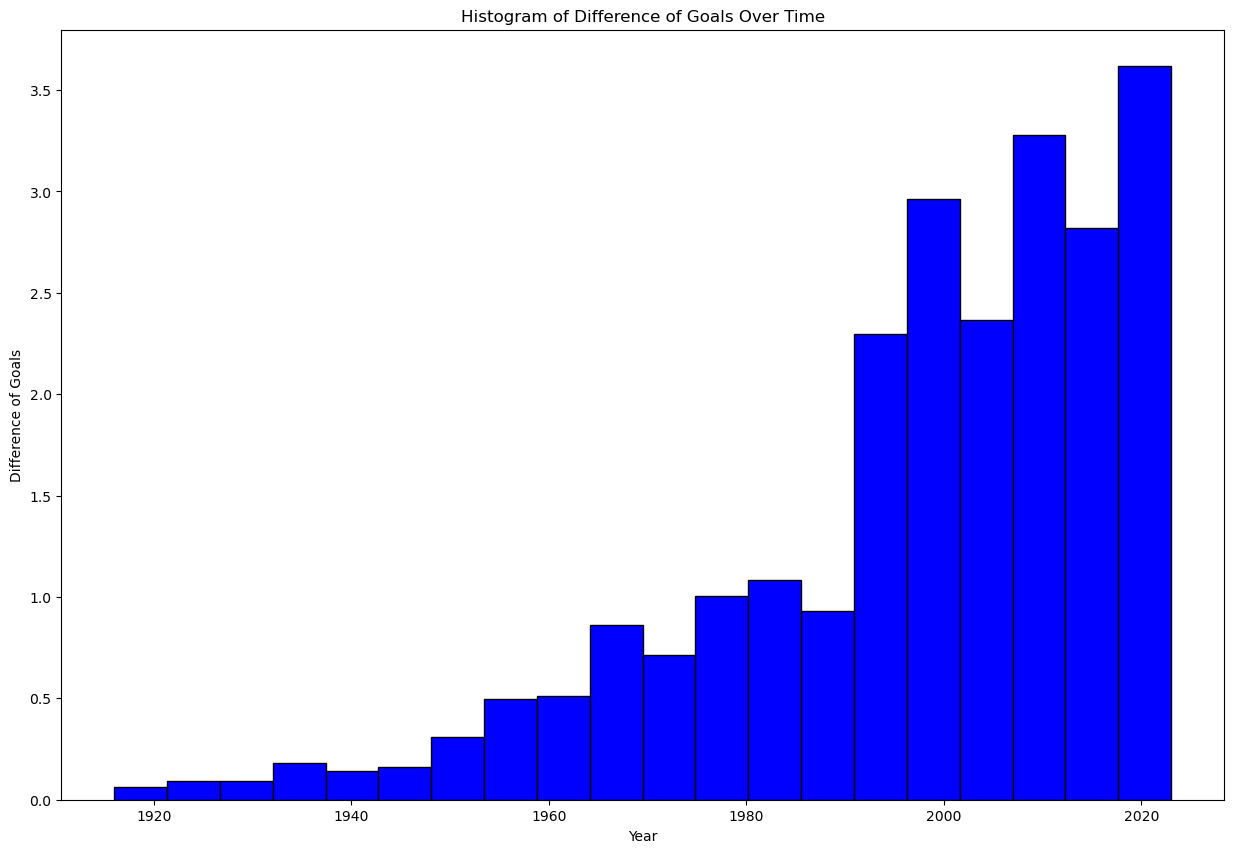

In [33]:
def plot_goals_over_time(df):
    plt.figure(figsize=(15, 10))
    
    year = pd.to_datetime(df6['date']).dt.year
    
    difference_of_goals_decimal = df6['difference_of_goals'] / 1000
    
    plt.hist(year, bins=20, weights=difference_of_goals_decimal, color='blue', edgecolor='black')
    
    plt.xlabel("Year")
    plt.ylabel("Difference of Goals")
    plt.title("Histogram of Difference of Goals Over Time")
    
    plt.show()

plot_goals_over_time(df6)

In [34]:
df6

,date,home_team,away_team,home_score,away_score,tournament,location,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament
0,1916-07-02,Chile,Uruguay,0.0,4.0,Copa América,neutral,0.0,8.0,4.0,8.0
4,1916-07-06,Argentina,Chile,6.0,1.0,Copa América,partisan,12.0,2.0,5.0,10.0
11,1916-07-08,Brazil,Chile,1.0,1.0,Copa América,neutral,2.0,2.0,0.0,0.0
13,1916-07-10,Argentina,Brazil,1.0,1.0,Copa América,partisan,2.0,2.0,0.0,0.0
15,1916-07-12,Brazil,Uruguay,1.0,2.0,Copa América,neutral,2.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
43852,2023-11-21,Wales,Turkey,1.0,1.0,UEFA Euro qualification,partisan,1.5,1.5,0.0,0.0
43854,2023-11-21,Croatia,Armenia,1.0,0.0,UEFA Euro qualification,partisan,1.5,0.0,1.0,1.5
43855,2023-11-21,Andorra,Israel,0.0,2.0,UEFA Euro qualification,partisan,0.0,3.0,2.0,3.0
43857,2023-11-21,Kosovo,Belarus,0.0,1.0,UEFA Euro qualification,partisan,0.0,1.5,1.0,1.5


In [35]:
# Creating a column that shows the average of goals scored and conceded by each team, formatted separately for regular matches and tournamentsdf7 = df6.copy()

df7 = df6.copy()

# average goals scored at home
average_home_scored = df7.groupby('home_team')['home_score'].mean().reset_index()
average_home_scored.columns = ['team', 'avg_home_scored']

#  average goals scored away
average_away_scored = df7.groupby('away_team')['away_score'].mean().reset_index()
average_away_scored.columns = ['team', 'avg_away_scored']

# average tournament goals scored at home
average_tournament_home_scored = df7.groupby('home_team')['tournament_home_score'].mean().reset_index()
average_tournament_home_scored.columns = ['team', 'avg_tournament_home_scored']

# average tournament goals scored away
average_tournament_away_scored = df7.groupby('away_team')['tournament_away_score'].mean().reset_index()
average_tournament_away_scored.columns = ['team', 'avg_tournament_away_scored']

# average goals conceded at home
average_home_conceded = df7.groupby('home_team')['away_score'].mean().reset_index()
average_home_conceded.columns = ['team', 'avg_home_conceded']

# average goals conceded away
average_away_conceded = df7.groupby('away_team')['home_score'].mean().reset_index()
average_away_conceded.columns = ['team', 'avg_away_conceded']

# average tournament goals conceded at home
average_tournament_home_conceded = df7.groupby('home_team')['tournament_away_score'].mean().reset_index()
average_tournament_home_conceded.columns = ['team', 'avg_tournament_home_conceded']

# average tournament goals conceded away
average_tournament_away_conceded = df7.groupby('away_team')['tournament_home_score'].mean().reset_index()
average_tournament_away_conceded.columns = ['team', 'avg_tournament_away_conceded']

# Step 2: Merge average scored and conceded goals with the original DataFrame based on the home team
df7 = pd.merge(df7, average_home_scored[['team', 'avg_home_scored']], left_on='home_team', right_on='team', how='left')
df7.rename(columns={'avg_home_scored': 'home_team_avg_scored'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop 'team' column

df7 = pd.merge(df7, average_tournament_home_scored[['team', 'avg_tournament_home_scored']], left_on='home_team', right_on='team', how='left')
df7.rename(columns={'avg_tournament_home_scored': 'home_team_avg_scored_tournament'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column

df7 = pd.merge(df7, average_home_conceded[['team', 'avg_home_conceded']], left_on='home_team', right_on='team', how='left')
df7.rename(columns={'avg_home_conceded': 'home_team_avg_conceded'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column

df7 = pd.merge(df7, average_tournament_home_conceded[['team', 'avg_tournament_home_conceded']], left_on='home_team', right_on='team', how='left')
df7.rename(columns={'avg_tournament_home_conceded': 'home_team_avg_conceded_tournament'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column

# Step 3: Merge average scored and conceded goals with the original DataFrame based on the away team
df7 = pd.merge(df7, average_away_scored[['team', 'avg_away_scored']], left_on='away_team', right_on='team', how='left')
df7.rename(columns={'avg_away_scored': 'away_team_avg_scored'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column

df7 = pd.merge(df7, average_tournament_away_scored[['team', 'avg_tournament_away_scored']], left_on='away_team', right_on='team', how='left')
df7.rename(columns={'avg_tournament_away_scored': 'away_team_avg_scored_tournament'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column

df7 = pd.merge(df7, average_away_conceded[['team', 'avg_away_conceded']], left_on='away_team', right_on='team', how='left')
df7.rename(columns={'avg_away_conceded': 'away_team_avg_conceded'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column

df7 = pd.merge(df7, average_tournament_away_conceded[['team', 'avg_tournament_away_conceded']], left_on='away_team', right_on='team', how='left')
df7.rename(columns={'avg_tournament_away_conceded': 'away_team_avg_conceded_tournament'}, inplace=True)
df7.drop(columns=['team'], inplace=True)  # Drop the 'team' column


print(df7.head())



        date  home_team away_team  home_score  away_score    tournament  \
0 1916-07-02      Chile   Uruguay         0.0         4.0  Copa América   
1 1916-07-06  Argentina     Chile         6.0         1.0  Copa América   
2 1916-07-08     Brazil     Chile         1.0         1.0  Copa América   
3 1916-07-10  Argentina    Brazil         1.0         1.0  Copa América   
4 1916-07-12     Brazil   Uruguay         1.0         2.0  Copa América   

   location  tournament_home_score  tournament_away_score  \
0   neutral                    0.0                    8.0   
1  partisan                   12.0                    2.0   
2   neutral                    2.0                    2.0   
3  partisan                    2.0                    2.0   
4   neutral                    2.0                    4.0   

   difference_of_goals  difference_of_goals_tournament  home_team_avg_scored  \
0                  4.0                             8.0              1.878788   
1                  5.0

In [36]:
# Filtering just the last 3 years



current_date = pd.Timestamp.now()

three_years_ago = current_date - pd.DateOffset(years=3)

df7 = df7[df7['date'] >= three_years_ago]



In [37]:
columns_to_drop = ['date', 'location', 'tournament']


df7 = df7.drop(columns=columns_to_drop)

In [38]:
print(df7.dtypes)


home_team                             object
away_team                             object
home_score                           float64
away_score                           float64
tournament_home_score                float64
tournament_away_score                float64
difference_of_goals                  float64
difference_of_goals_tournament       float64
home_team_avg_scored                 float64
home_team_avg_scored_tournament      float64
home_team_avg_conceded               float64
home_team_avg_conceded_tournament    float64
away_team_avg_scored                 float64
away_team_avg_scored_tournament      float64
away_team_avg_conceded               float64
away_team_avg_conceded_tournament    float64
dtype: object


In [39]:
df8 = df7.copy()

#Function to determine winner or draw
def determine_winner_or_draw(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['away_score'] > row['home_score']:
        return row['away_team']
    else:
        return 'Draw'

df8['winner'] = df8.apply(determine_winner_or_draw, axis=1)
df8

,home_team,away_team,home_score,away_score,tournament_home_score,tournament_away_score,difference_of_goals,difference_of_goals_tournament,home_team_avg_scored,home_team_avg_scored_tournament,home_team_avg_conceded,home_team_avg_conceded_tournament,away_team_avg_scored,away_team_avg_scored_tournament,away_team_avg_conceded,away_team_avg_conceded_tournament,winner
11701,Switzerland,Spain,1.0,1.0,2.0,2.0,0.0,0.0,2.049645,3.602837,1.056738,1.914894,1.820652,3.260870,1.086957,1.953804,Draw
11702,Belgium,Italy,1.0,2.0,2.0,4.0,1.0,2.0,2.329545,4.187500,1.017045,1.846591,1.692810,3.058824,1.065359,1.937908,Italy
11703,Peru,Paraguay,3.0,3.0,6.0,6.0,0.0,0.0,1.552448,3.104895,1.279720,2.559441,1.258537,2.517073,1.936585,3.873171,Draw
11704,Brazil,Chile,1.0,0.0,2.0,0.0,1.0,2.0,2.674157,5.348315,0.891386,1.782772,1.191358,2.382716,2.055556,4.111111,Brazil
11705,Czech Republic,Denmark,1.0,2.0,2.0,4.0,1.0,2.0,2.217391,3.891304,0.956522,1.711957,1.537975,2.734177,1.455696,2.591772,Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12664,Wales,Turkey,1.0,1.0,1.5,1.5,0.0,0.0,1.550388,2.736434,1.139535,2.042636,1.232877,2.188356,1.753425,3.102740,Draw
12665,Croatia,Armenia,1.0,0.0,1.5,0.0,1.0,1.5,2.126316,3.721053,0.884211,1.605263,0.937500,1.562500,1.987500,3.406250,Croatia
12666,Andorra,Israel,0.0,2.0,0.0,3.0,2.0,3.0,0.376812,0.666667,2.550725,4.434783,1.280000,2.265000,1.800000,3.230000,Israel
12667,Kosovo,Belarus,0.0,1.0,0.0,1.5,1.0,1.5,1.230769,1.923077,1.576923,2.807692,0.893333,1.493333,1.986667,3.453333,Belarus


In [40]:
df9 = df8.copy()

# Let's drop the 'difference of goals' column since we have already used it to determine an outlier
columns_to_drop = ['difference_of_goals', 'difference_of_goals_tournament', ]
df9 = df9.drop(columns=columns_to_drop)

# Let's create dummy columns with the values of 'winner'
dummies1 = pd.get_dummies(df8.winner)
dummies1.head(3)

dummies1.head()

,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Belarus,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Now, let's assign numerical values to the columns of 'home team' and 'away team with label enconder
combined = pd.concat([df9['home_team'], df9['away_team']], axis=0)


label_encoder = LabelEncoder()
label_encoder.fit(combined)



# Transform the Home and Away columns
df9['Team_1'] = label_encoder.transform(df9['home_team'])
df9['Team_2'] = label_encoder.transform(df9['away_team'])
df9



,home_team,away_team,home_score,away_score,tournament_home_score,tournament_away_score,home_team_avg_scored,home_team_avg_scored_tournament,home_team_avg_conceded,home_team_avg_conceded_tournament,away_team_avg_scored,away_team_avg_scored_tournament,away_team_avg_conceded,away_team_avg_conceded_tournament,winner,Team_1,Team_2
11701,Switzerland,Spain,1.0,1.0,2.0,2.0,2.049645,3.602837,1.056738,1.914894,1.820652,3.260870,1.086957,1.953804,Draw,124,120
11702,Belgium,Italy,1.0,2.0,2.0,4.0,2.329545,4.187500,1.017045,1.846591,1.692810,3.058824,1.065359,1.937908,Italy,10,63
11703,Peru,Paraguay,3.0,3.0,6.0,6.0,1.552448,3.104895,1.279720,2.559441,1.258537,2.517073,1.936585,3.873171,Draw,101,100
11704,Brazil,Chile,1.0,0.0,2.0,0.0,2.674157,5.348315,0.891386,1.782772,1.191358,2.382716,2.055556,4.111111,Brazil,14,21
11705,Czech Republic,Denmark,1.0,2.0,2.0,4.0,2.217391,3.891304,0.956522,1.711957,1.537975,2.734177,1.455696,2.591772,Denmark,30,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12664,Wales,Turkey,1.0,1.0,1.5,1.5,1.550388,2.736434,1.139535,2.042636,1.232877,2.188356,1.753425,3.102740,Draw,139,131
12665,Croatia,Armenia,1.0,0.0,1.5,0.0,2.126316,3.721053,0.884211,1.605263,0.937500,1.562500,1.987500,3.406250,Croatia,27,5
12666,Andorra,Israel,0.0,2.0,0.0,3.0,0.376812,0.666667,2.550725,4.434783,1.280000,2.265000,1.800000,3.230000,Israel,2,62
12667,Kosovo,Belarus,0.0,1.0,0.0,1.5,1.230769,1.923077,1.576923,2.807692,0.893333,1.493333,1.986667,3.453333,Belarus,69,9


In [42]:
# Let's drop the object columns 'home team' and 'away team'
df10 = df9.drop(['home_team', 'away_team'], axis='columns')

df10.head(2)

,home_score,away_score,tournament_home_score,tournament_away_score,home_team_avg_scored,home_team_avg_scored_tournament,home_team_avg_conceded,home_team_avg_conceded_tournament,away_team_avg_scored,away_team_avg_scored_tournament,away_team_avg_conceded,away_team_avg_conceded_tournament,winner,Team_1,Team_2
11701,1.0,1.0,2.0,2.0,2.049645,3.602837,1.056738,1.914894,1.820652,3.260870,1.086957,1.953804,Draw,124,120
11702,1.0,2.0,2.0,4.0,2.329545,4.187500,1.017045,1.846591,1.692810,3.058824,1.065359,1.937908,Italy,10,63


In [43]:
# Concatenating the previously created dummy columns with the dataframe
df11 = pd.concat([df10, dummies1], axis='columns')


df11.head()

,home_score,away_score,tournament_home_score,tournament_away_score,home_team_avg_scored,home_team_avg_scored_tournament,home_team_avg_conceded,home_team_avg_conceded_tournament,away_team_avg_scored,away_team_avg_scored_tournament,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,1.0,1.0,2.0,2.0,2.049645,3.602837,1.056738,1.914894,1.820652,3.260870,...,0,0,0,0,0,0,0,0,0,0
11702,1.0,2.0,2.0,4.0,2.329545,4.187500,1.017045,1.846591,1.692810,3.058824,...,0,0,0,0,0,0,0,0,0,0
11703,3.0,3.0,6.0,6.0,1.552448,3.104895,1.279720,2.559441,1.258537,2.517073,...,0,0,0,0,0,0,0,0,0,0
11704,1.0,0.0,2.0,0.0,2.674157,5.348315,0.891386,1.782772,1.191358,2.382716,...,0,0,0,0,0,0,0,0,0,0
11705,1.0,2.0,2.0,4.0,2.217391,3.891304,0.956522,1.711957,1.537975,2.734177,...,0,0,0,0,0,0,0,0,0,0


In [44]:
column_names = df11.columns.tolist()
print(column_names)

['home_score', 'away_score', 'tournament_home_score', 'tournament_away_score', 'home_team_avg_scored', 'home_team_avg_scored_tournament', 'home_team_avg_conceded', 'home_team_avg_conceded_tournament', 'away_team_avg_scored', 'away_team_avg_scored_tournament', 'away_team_avg_conceded', 'away_team_avg_conceded_tournament', 'winner', 'Team_1', 'Team_2', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chile', 'China PR', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'DR Congo', 'Denmark', 'Draw', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guadeloupe', 'Guatemala', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hun

# Recursive Feature Elimination RFE 

In [45]:

estimator = RandomForestClassifier(random_state=42)  # No extra arguments beyond random_state


In [46]:
# Prepare feature matrix X and target variable y
X = df11.drop(['winner'], axis=1)  
y = df11['winner']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator = RandomForestClassifier(random_state=42)


n_features_to_select = 5  
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)  

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['home_team_avg_scored', 'home_team_avg_scored_tournament',
       'away_team_avg_scored_tournament', 'away_team_avg_conceded_tournament',
       'Team_1'],
      dtype='object')


In [47]:
X

,home_score,away_score,tournament_home_score,tournament_away_score,home_team_avg_scored,home_team_avg_scored_tournament,home_team_avg_conceded,home_team_avg_conceded_tournament,away_team_avg_scored,away_team_avg_scored_tournament,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,1.0,1.0,2.0,2.0,2.049645,3.602837,1.056738,1.914894,1.820652,3.260870,...,0,0,0,0,0,0,0,0,0,0
11702,1.0,2.0,2.0,4.0,2.329545,4.187500,1.017045,1.846591,1.692810,3.058824,...,0,0,0,0,0,0,0,0,0,0
11703,3.0,3.0,6.0,6.0,1.552448,3.104895,1.279720,2.559441,1.258537,2.517073,...,0,0,0,0,0,0,0,0,0,0
11704,1.0,0.0,2.0,0.0,2.674157,5.348315,0.891386,1.782772,1.191358,2.382716,...,0,0,0,0,0,0,0,0,0,0
11705,1.0,2.0,2.0,4.0,2.217391,3.891304,0.956522,1.711957,1.537975,2.734177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12664,1.0,1.0,1.5,1.5,1.550388,2.736434,1.139535,2.042636,1.232877,2.188356,...,0,0,0,0,0,0,0,0,0,0
12665,1.0,0.0,1.5,0.0,2.126316,3.721053,0.884211,1.605263,0.937500,1.562500,...,0,0,0,0,0,0,0,0,0,0
12666,0.0,2.0,0.0,3.0,0.376812,0.666667,2.550725,4.434783,1.280000,2.265000,...,0,0,0,0,0,0,0,0,0,0
12667,0.0,1.0,0.0,1.5,1.230769,1.923077,1.576923,2.807692,0.893333,1.493333,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Feature ranking
print("Feature Ranking:")
print(dict(zip(X.columns, rfe.ranking_)))
# Create a dictionary of feature names and their rankings
feature_ranking_dict = dict(zip(X.columns, rfe.ranking_))

# Sort the dictionary based on ranking (1 being the highest, lower is better)
sorted_feature_ranking = sorted(feature_ranking_dict.items(), key=lambda x: x[1])

# top 15 features based on ranking
top_15_features = sorted_feature_ranking[:15]
for feature, rank in top_15_features:
    print(f"{feature}: {rank}")

Feature Ranking:
{'home_score': 10, 'away_score': 11, 'tournament_home_score': 8, 'tournament_away_score': 9, 'home_team_avg_scored': 1, 'home_team_avg_scored_tournament': 1, 'home_team_avg_conceded': 4, 'home_team_avg_conceded_tournament': 5, 'away_team_avg_scored': 7, 'away_team_avg_scored_tournament': 1, 'away_team_avg_conceded': 3, 'away_team_avg_conceded_tournament': 1, 'Team_1': 1, 'Team_2': 6, 'Albania': 63, 'Algeria': 79, 'Andorra': 85, 'Angola': 125, 'Argentina': 31, 'Armenia': 92, 'Australia': 71, 'Austria': 42, 'Azerbaijan': 76, 'Belarus': 91, 'Belgium': 21, 'Benin': 98, 'Bolivia': 90, 'Bosnia and Herzegovina': 60, 'Brazil': 39, 'Bulgaria': 74, 'Burkina Faso': 97, 'Cameroon': 59, 'Canada': 33, 'Cape Verde': 88, 'Central African Republic': 120, 'Chile': 81, 'China PR': 131, 'Colombia': 77, 'Costa Rica': 19, 'Croatia': 15, 'Cyprus': 137, 'Czech Republic': 41, 'DR Congo': 100, 'Denmark': 12, 'Draw': 2, 'Ecuador': 65, 'Egypt': 75, 'El Salvador': 67, 'England': 20, 'Equatorial Gu

## feature importance Randon forest

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


sorted_importances = feature_importance_df.sort_values(by='Importance', ascending=False)

# top 10 features
top_15_features = sorted_importances.head(15)

# Print the top 10 features
print("Top 10 Feature Importances:")
print(top_15_features)

Top 10 Feature Importances:
                               Feature  Importance
44                                Draw    0.098109
4                 home_team_avg_scored    0.033173
7    home_team_avg_conceded_tournament    0.032596
5      home_team_avg_scored_tournament    0.031107
12                              Team_1    0.029767
6               home_team_avg_conceded    0.029536
11   away_team_avg_conceded_tournament    0.027101
9      away_team_avg_scored_tournament    0.026046
8                 away_team_avg_scored    0.025796
13                              Team_2    0.024702
10              away_team_avg_conceded    0.024083
2                tournament_home_score    0.020935
0                           home_score    0.020404
43                             Denmark    0.019740
108                           Portugal    0.019468


In [52]:
y_pred = rf.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")

Random Forest Classifier Accuracy: 89.69%


In [53]:
df11

,home_score,away_score,tournament_home_score,tournament_away_score,home_team_avg_scored,home_team_avg_scored_tournament,home_team_avg_conceded,home_team_avg_conceded_tournament,away_team_avg_scored,away_team_avg_scored_tournament,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,1.0,1.0,2.0,2.0,2.049645,3.602837,1.056738,1.914894,1.820652,3.260870,...,0,0,0,0,0,0,0,0,0,0
11702,1.0,2.0,2.0,4.0,2.329545,4.187500,1.017045,1.846591,1.692810,3.058824,...,0,0,0,0,0,0,0,0,0,0
11703,3.0,3.0,6.0,6.0,1.552448,3.104895,1.279720,2.559441,1.258537,2.517073,...,0,0,0,0,0,0,0,0,0,0
11704,1.0,0.0,2.0,0.0,2.674157,5.348315,0.891386,1.782772,1.191358,2.382716,...,0,0,0,0,0,0,0,0,0,0
11705,1.0,2.0,2.0,4.0,2.217391,3.891304,0.956522,1.711957,1.537975,2.734177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12664,1.0,1.0,1.5,1.5,1.550388,2.736434,1.139535,2.042636,1.232877,2.188356,...,0,0,0,0,0,0,0,0,0,0
12665,1.0,0.0,1.5,0.0,2.126316,3.721053,0.884211,1.605263,0.937500,1.562500,...,0,0,0,0,0,0,0,0,0,0
12666,0.0,2.0,0.0,3.0,0.376812,0.666667,2.550725,4.434783,1.280000,2.265000,...,0,0,0,0,0,0,0,0,0,0
12667,0.0,1.0,0.0,1.5,1.230769,1.923077,1.576923,2.807692,0.893333,1.493333,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# then we can drop: 

columns_to_drop = ['away_score', 'home_score', 'home_team_avg_scored','away_team_avg_scored','home_team_avg_conceded',
                 'away_team_avg_conceded','tournament_home_score','tournament_away_score',]


df10_tournament = df11.drop(columns=columns_to_drop)
df10_tournament


,home_team_avg_scored_tournament,home_team_avg_conceded_tournament,away_team_avg_scored_tournament,away_team_avg_conceded_tournament,winner,Team_1,Team_2,Albania,Algeria,Andorra,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,3.602837,1.914894,3.260870,1.953804,Draw,124,120,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11702,4.187500,1.846591,3.058824,1.937908,Italy,10,63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11703,3.104895,2.559441,2.517073,3.873171,Draw,101,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11704,5.348315,1.782772,2.382716,4.111111,Brazil,14,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11705,3.891304,1.711957,2.734177,2.591772,Denmark,30,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12664,2.736434,2.042636,2.188356,3.102740,Draw,139,131,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12665,3.721053,1.605263,1.562500,3.406250,Croatia,27,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12666,0.666667,4.434783,2.265000,3.230000,Israel,2,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12667,1.923077,2.807692,1.493333,3.453333,Belarus,69,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Let's repeat the process we already did, but with the new dataframe that has the more important features
df12 = df10_tournament.copy()


dummies2 = pd.get_dummies(df11.winner)
dummies2.head(3)


# Now df7 contains numerical representations of the categorical columns
dummies2.head()

,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Belarus,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12 = pd.concat([df12, dummies2], axis='columns')

df12.head()

,home_team_avg_scored_tournament,home_team_avg_conceded_tournament,away_team_avg_scored_tournament,away_team_avg_conceded_tournament,winner,Team_1,Team_2,Albania,Algeria,Andorra,...,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Vietnam,Wales,Zambia
11701,3.602837,1.914894,3.260870,1.953804,Draw,124,120,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11702,4.187500,1.846591,3.058824,1.937908,Italy,10,63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11703,3.104895,2.559441,2.517073,3.873171,Draw,101,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11704,5.348315,1.782772,2.382716,4.111111,Brazil,14,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11705,3.891304,1.711957,2.734177,2.591772,Denmark,30,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [57]:
# Define features and target variables
X = df12.drop(['winner'], axis=1)  # Features
y = df12[['winner']]  # Target variables

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()

multi_target_model = MultiOutputClassifier(log_reg, n_jobs=-1)

# Train the model
multi_target_model.fit(X_train, y_train)

# Make predictions
y_pred = multi_target_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Print classification report for each output
for i, col in enumerate(y.columns):
    print(f"Classification Report for {col}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


/Users/kristianfigueroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Accuracy: 0.4485
Classification Report for winner:
                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         2
               Algeria       0.00      0.00      0.00         1
             Argentina       0.33      0.50      0.40         4
             Australia       0.00      0.00      0.00         2
               Austria       0.00      0.00      0.00         4
            Azerbaijan       0.00      0.00      0.00         1
               Belarus       0.00      0.00      0.00         1
               Belgium       0.67      1.00      0.80         2
                 Benin       0.00      0.00      0.00         1
               Bolivia       0.00      0.00      0.00         0
Bosnia and Herzegovina       0.00      0.00      0.00         1
                Brazil       0.00      0.00      0.00         4
          Burkina Faso       0.00      0.00      0.00         1
              Cameroon       0.00      0.00 

/Users/kristianfigueroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kristianfigueroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kristianfigueroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

## DecisionTree

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")



Overall Accuracy: 0.9381


## Random Forests

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


/Users/kristianfigueroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Overall Accuracy: 0.9553


# Checking other results for accuracy purposes

## Random Forest

In [60]:


# Predict on test set
y_pred_rf = rf_classifier.predict(X_test)

# True labels for the test set
y_true_rf = y_test  

# Compute metrics for Random Forest
hamming_loss_rf = hamming_loss(y_true_rf, y_pred_rf)
subset_accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_true_rf, y_pred_rf, average='micro')

print("Random Forest Metrics:")
print(f"Hamming Loss: {hamming_loss_rf:.4f}")
print(f"Subset Accuracy: {subset_accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_score_rf:.4f}")

Random Forest Metrics:
Hamming Loss: 0.0447
Subset Accuracy: 0.9553
Precision: 0.9553, Recall: 0.9553, F1-score: 0.9553


## Decision Tree

In [61]:

# Predict on test set

y_pred_dt = dt_classifier.predict(X_test)

# Compute metrics for Decision Tree
hamming_loss_dt = hamming_loss(y_test, y_pred_dt)
subset_accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt, recall_dt, f1_score_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='micro')

print("Decision Tree Metrics:")
print(f"Hamming Loss: {hamming_loss_dt:.4f}")
print(f"Subset Accuracy: {subset_accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_score_dt:.4f}")

Decision Tree Metrics:
Hamming Loss: 0.0619
Subset Accuracy: 0.9381
Precision: 0.9381, Recall: 0.9381, F1-score: 0.9381


## Logistic Regression

In [62]:

# Predict on test set
y_pred = multi_target_model.predict(X_test)


# Compute metrics for Logistic Regression
hamming_loss_lr = hamming_loss(y_test, y_pred)
subset_accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr, recall_lr, f1_score_lr, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')

print("Logistic Regression Metrics:")
print(f"Hamming Loss: {hamming_loss_lr:.4f}")
print(f"Subset Accuracy: {subset_accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_score_lr:.4f}")

Logistic Regression Metrics:
Hamming Loss: 0.5017
Subset Accuracy: 0.4983
Precision: 0.4983, Recall: 0.4983, F1-score: 0.4983


In [63]:
X.columns


Index(['home_team_avg_scored_tournament', 'home_team_avg_conceded_tournament',
       'away_team_avg_scored_tournament', 'away_team_avg_conceded_tournament',
       'Team_1', 'Team_2', 'Albania', 'Algeria', 'Andorra', 'Angola',
       ...
       'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United States',
       'Uruguay', 'Venezuela', 'Vietnam', 'Wales', 'Zambia'],
      dtype='object', length=260)

In [64]:
np.where(X.columns=='Team_1')[0][0]


4

In [65]:
# Now, let's test our model using a Random Forest Classifier.
def predict_winner(Team_1, Team_2):
    team_1_col = f'{Team_1}'
    team_2_col = f'{Team_2}'
    
   
    # Initialize the feature vector
    x = np.zeros(len(X.columns))
    
    # Set the one-hot encoded values for Team_1 and Team_2
    x[X.columns.get_loc(team_1_col)] = 1
    x[X.columns.get_loc(team_2_col)] = 1
    
    # Predict the outcome
    return rf_classifier.predict([x])[0]



In [66]:
try:
    # Predict winner 
    result = predict_winner('Mexico', 'Argentina')
    print(f'Predicted Winner: {result}')
except ValueError as e:
    print(e)

Predicted Winner: Mexico


/Users/kristianfigueroa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Export the tested model to a pickle file


In [67]:
#now let's export the pickle file and the columns
with open('Copa_america_model.pickle','wb') as f:
    pickle.dump(rf_classifier,f)

In [68]:

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columnsca.json","w") as f:
    f.write(json.dumps(columns))